In [72]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------- ----------------- 6.3/11.1 MB 32.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 33.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at d:\miniconda3\lib\site-packages\tinycudann-1.7-py3.12-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [316]:
import pandas as pd
from sodapy import Socrata
from suncalc import get_position, get_times
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import anderson, jarque_bera, kstest, norm
from geojson import LineString as GeoLineString, Point
from turfpy.measurement import along
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
import json
from urllib.parse import quote
import requests
import polyline
from shapely.geometry import LineString
import osmnx as ox
import sklearn
from scipy.spatial import cKDTree
import networkx as nx
from pyproj import Transformer
import pyproj
import geopandas as gpd

In [ ]:
# import pandas as pd
# from sodapy import Socrata
# from suncalc import get_position, get_times
# from datetime import datetime
# import math
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy import stats
# from scipy.stats import anderson, jarque_bera, kstest, norm
# import requests
# import json
# from geojson import LineString, Point
# from turfpy.measurement import along

client = Socrata("data.lacity.org",
                 "QZUCzRp0ZlNxI8gCSM3Gc77i0",
                 username="nadulakadawedduwa@gmail.com",
                 password="nvwDwQt58EZLS!R")

results = client.get("d5tf-ez2w", limit=20000)
# , offset=2000)
results_df = pd.DataFrame.from_records(results)


In [55]:
# import json
# import os
# import re
# import sys
# import subprocess
for index, row in results_df.iterrows():
    hr = int(row['time_occ']) // 100
    m = int(row['time_occ']) % 100
    year, month, day = map(int, row['date_occ'].split("T")[0].split("-"))
    time = datetime(year, month, day, hr, m, 0)
    location_dict = (row['location_1'])
    latitude = float(location_dict['latitude'])
    longitude = float(location_dict['longitude'])
    # print()
    position = get_position(time, longitude, latitude)
    # print("Sun Position:")
    results_df.loc[index, 'azimuth'] = math.degrees(position['azimuth'])
    results_df.loc[index, 'altitude'] = math.degrees(position['altitude'])
    # print(f"Azimuth: {position['azimuth']}")
    # print(f"Altitude: {position['altitude']}")

display(results_df)

# print(time)
# Get sun position

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,mocodes,...,cross_street,location_1,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,azimuth,altitude
0,190319651,2019-08-24T00:00:00.000,2019-08-24T00:00:00.000,0450,03,Southwest,0356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,...,NORMANDIE AV,"{'latitude': '34.0255', 'longitude': '-118.300...",22724,691,916,7,14,32,-161.876663,-42.946626
1,190319680,2019-08-30T00:00:00.000,2019-08-30T00:00:00.000,2320,03,Southwest,0355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,...,W WESTERN,"{'latitude': '34.0256', 'longitude': '-118.308...",23079,686,919,7,12,19,109.728680,-12.255812
2,190413769,2019-08-25T00:00:00.000,2019-08-25T00:00:00.000,0545,04,Hollenbeck,0422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,...,W EASTLAKE AV,"{'latitude': '34.0738', 'longitude': '-118.207...",23448,488,516,NaN,11,1,-145.061425,-38.060303
3,190127578,2019-11-20T00:00:00.000,2019-11-20T00:00:00.000,0350,01,Central,0128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,...,CENTRAL,"{'latitude': '34.0492', 'longitude': '-118.239...",22728,536,1502,NaN,9,28,-128.031863,-68.604846
4,190319695,2019-08-30T00:00:00.000,2019-08-30T00:00:00.000,2100,03,Southwest,0374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,...,ARLINGTON AV,"{'latitude': '34.0108', 'longitude': '-118.318...",22725,747,1017,7,14,35,89.915751,16.235247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,191117985,2019-10-13T00:00:00.000,2019-10-11T00:00:00.000,1110,11,Northeast,1124,997,TRAFFIC COLLISION,NaN,...,NaN,"{'latitude': '34.1178', 'longitude': '-118.248...",24030,388,583,NaN,8,56,-71.215200,14.203812
19996,210617152,2021-10-09T00:00:00.000,2021-10-09T00:00:00.000,1105,06,Hollywood,0644,997,TRAFFIC COLLISION,3025 3035 3037 4027 0947 3004 3101 3401 3701,...,VISTA ST,"{'latitude': '34.0944', 'longitude': '-118.351...",23677,NaN,1237,NaN,NaN,82,-72.588003,13.431671
19997,191421561,2019-10-06T00:00:00.000,2019-10-06T00:00:00.000,1215,14,Pacific,1433,997,TRAFFIC COLLISION,3004 3028 3030 3035 3037 3101 3401 3701 4027,...,WALGROVE AV,"{'latitude': '33.9973', 'longitude': '-118.446...",25073,911,854,10,10,30,-62.003277,27.412282
19998,191821347,2019-10-12T00:00:00.000,2019-10-11T00:00:00.000,1830,18,Southeast,1863,997,TRAFFIC COLLISION,4025 3037 3006 3028 3030 3103,...,SAN PEDRO,"{'latitude': '33.9265', 'longitude': '-118.269...",24355,810,1195,7,15,53,52.634876,32.655720


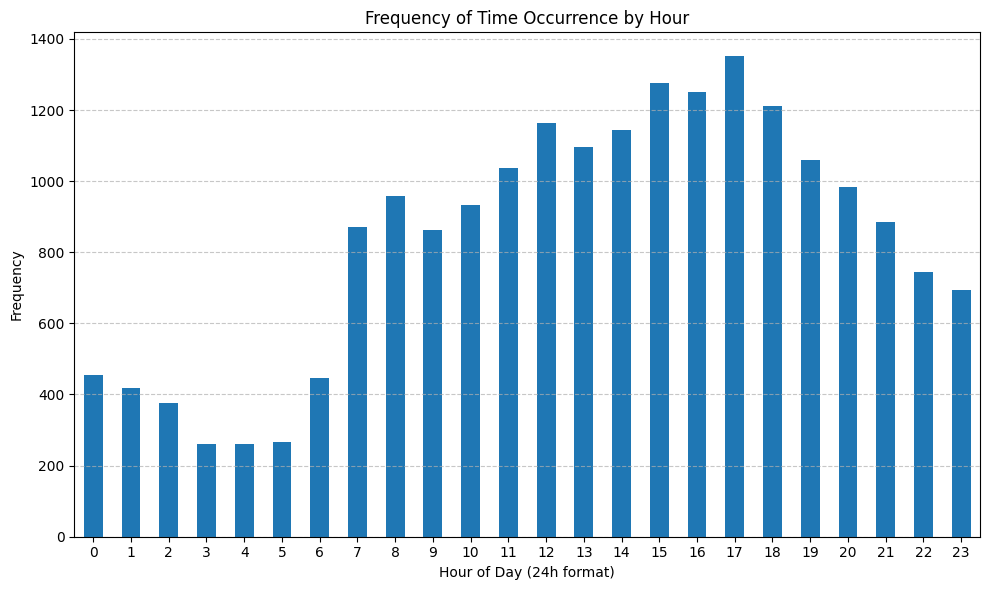

In [56]:
results_df['hour'] = results_df['time_occ'].astype(str).str.zfill(4).str[:2].astype(int)

# Count frequency of each hour
hour_counts = results_df['hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar')
plt.xlabel('Hour of Day (24h format)')
plt.ylabel('Frequency')
plt.title('Frequency of Time Occurrence by Hour')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

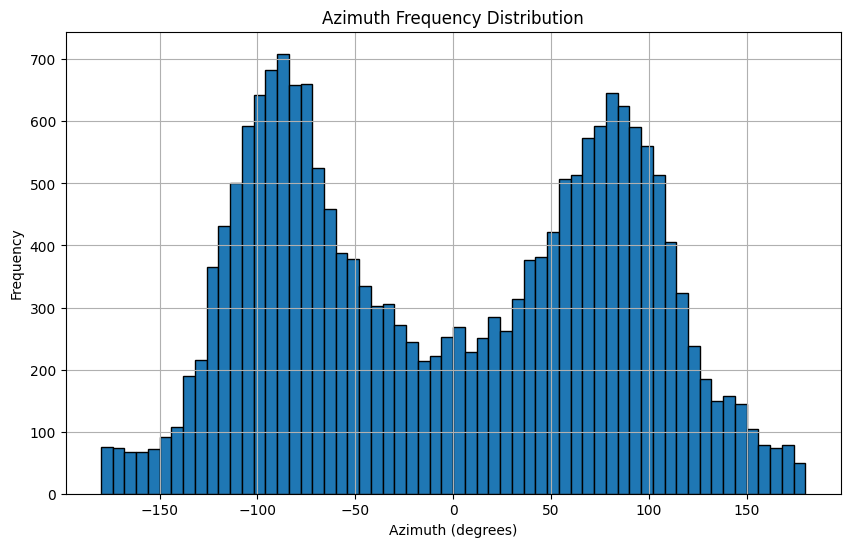

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(results_df['azimuth'], bins=60, edgecolor='black')
plt.title('Azimuth Frequency Distribution')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

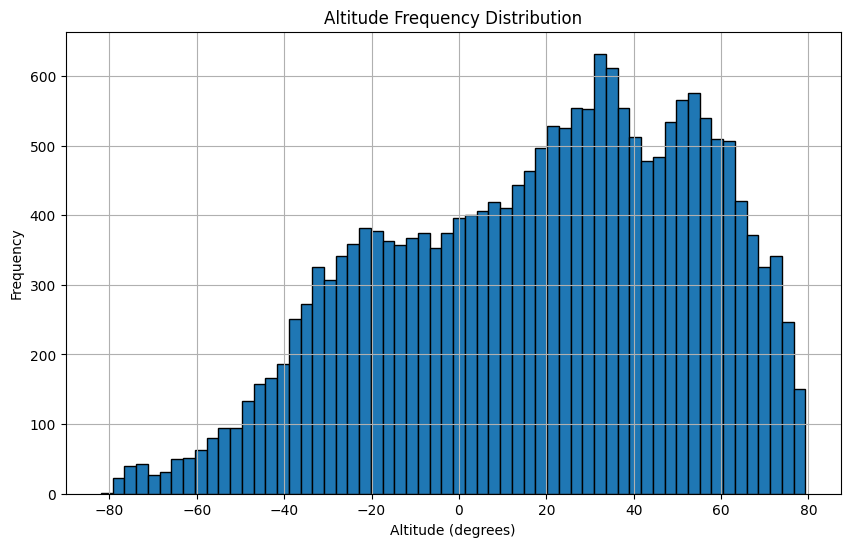

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(results_df['altitude'], bins=60, edgecolor='black')
plt.title('Altitude Frequency Distribution')
plt.xlabel('Altitude (degrees)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [59]:
data = results_df['altitude']

# Shapiro-Wilk Test for normality
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

# Kolmogorov-Smirnov test against N(40, std of sample)
ks_stat, ks_p = stats.kstest(data, 'norm', args=(40, data.std()))
print(f"Kolmogorov-Smirnov test: statistic={ks_stat:.4f}, p-value={ks_p:.4f}")

# Interpretation
if shapiro_p > 0.05 and ks_p > 0.05:
    print("The data likely follows a normal distribution centered around 40.")
else:
    print("The data does not appear to be normally distributed around 40.")

Shapiro-Wilk test: statistic=0.9700, p-value=0.0000
Kolmogorov-Smirnov test: statistic=0.1909, p-value=0.0000
The data does not appear to be normally distributed around 40.


d:\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


In [65]:
anderson_result = anderson(data, dist='norm')
print("Anderson-Darling test statistic:", anderson_result.statistic)
for i, (cv, sig) in enumerate(zip(anderson_result.critical_values, anderson_result.significance_level)):
    if anderson_result.statistic < cv:
        print(f"At {sig}% significance: data looks normal (statistic < critical value {cv})")
    else:
        print(f"At {sig}% significance: data NOT normal (statistic >= critical value {cv})")

# Jarque-Bera test
jb_stat, jb_p = jarque_bera(data)
print(f"Jarque-Bera test: statistic={jb_stat:.4f}, p-value={jb_p:.4f}")

# Kolmogorov-Smirnov test against N(40, std)
ks_stat, ks_p = kstest(data, 'norm', args=(40, data.std()))
print(f"Kolmogorov-Smirnov test: statistic={ks_stat:.4f}, p-value={ks_p:.4f}")

Anderson-Darling test statistic: 161.69383083846697
At 15.0% significance: data NOT normal (statistic >= critical value 0.576)
At 10.0% significance: data NOT normal (statistic >= critical value 0.656)
At 5.0% significance: data NOT normal (statistic >= critical value 0.787)
At 2.5% significance: data NOT normal (statistic >= critical value 0.918)
At 1.0% significance: data NOT normal (statistic >= critical value 1.092)
Jarque-Bera test: statistic=897.2481, p-value=0.0000
Kolmogorov-Smirnov test: statistic=0.1909, p-value=0.0000


## Create area graph based on start and end

In [371]:
start_lat, start_lon = 52.467619, 13.309507
end_lat, end_lon = 52.409059, 13.251493
# start_lat, start_lon = 40.7128, -74.0060  # New York City
# end_lat, end_lon = 40.7580, -73.9855      # Times Square
start = [start_lat, start_lon]
end = [end_lat, end_lon]

G = ox.graph_from_point((start_lat, start_lon), dist=3000, network_type="drive", retain_all=False, truncate_by_edge=True)

G_projected = ox.project_graph(G)  # Convert to UTM (meters)

# Transform lat/lon → projected x/y
crs_projected = G_projected.graph["crs"]
transformer = Transformer.from_crs("EPSG:4326", crs_projected, always_xy=True)
x1, y1 = transformer.transform(start_lon, start_lat)
x2, y2 = transformer.transform(end_lon, end_lat)

start_node = ox.distance.nearest_nodes(G_projected, X=x1, Y=y1)
end_node = ox.distance.nearest_nodes(G_projected, X=x2, Y=y2)
# print(G_projected)
# print(start_node)
# print(end_node)

## Find shortest route from start to end

In [374]:
route = nx.shortest_path(G_projected, start_node, end_node, weight="length")
# print(route)

route_line = LineString([(G_projected.nodes[n]["x"], G_projected.nodes[n]["y"]) for n in route])
buffered_route = route_line.buffer(400)

nodes_gdf = ox.graph_to_gdfs(G_projected, edges=False)

# # Select nodes within the buffer (spatial intersection)
nodes_within_buffer = nodes_gdf[nodes_gdf.geometry.within(buffered_route)]

# # Count nodes
count = len(nodes_within_buffer)
print(f"Number of nodes within the buffer: {count}")

gdf_buffer = gpd.GeoDataFrame(geometry=[buffered_route], crs=G.graph["crs"])

Number of nodes within the buffer: 239


## Visualize areaa and considered nodes

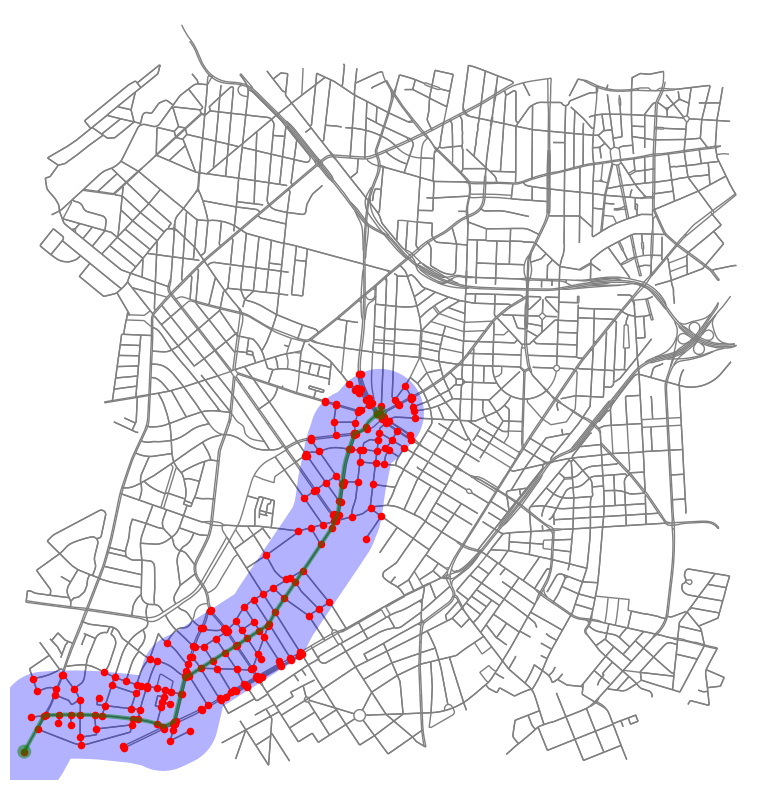

In [375]:
nodes_gdf = ox.graph_to_gdfs(G_projected, edges=False)

# 2. Filter nodes within the buffer
nodes_within_buffer = nodes_gdf[nodes_gdf.geometry.within(buffered_route)]

# 3. Plot
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(
    G_projected, 
    node_size=0, 
    edge_color="gray", 
    show=False, 
    close=False,
    ax=ax
)
# Plot the buffer zone
gpd.GeoDataFrame(geometry=[buffered_route], crs=G_projected.graph["crs"]).plot(
    ax=ax, color="blue", alpha=0.3, label="Buffer"
)

# Plot only the nodes within the buffer
nodes_within_buffer.plot(ax=ax, color="red", markersize=20, label="Nodes in buffer")
ox.plot_graph_route(
    G_projected, 
    route, 
    route_linewidth=3, 
    route_color="green", 
    ax=ax, 
    orig_dest_node_alpha=0
)

# ax.legend()
plt.show()

In [376]:
buffer_node_ids = set(nodes_within_buffer.index)

max_length = 0

for u, v, k, data in G_projected.edges(keys=True, data=True):
    if u in buffer_node_ids and v in buffer_node_ids:
        if data["length"] > max_length:
            max_length = data["length"]
# print(max_length)
edge_labels = {}

for u, v, k, data in G_projected.edges(keys=True, data=True):
    if u in buffer_node_ids and v in buffer_node_ids:
        data["weight"] = data["length"] / max_length

        u_x, u_y = G_projected.nodes[u]['x'], G_projected.nodes[u]['y']
        v_x, v_y = G_projected.nodes[v]['x'], G_projected.nodes[v]['y']
        u_lon, u_lat = transformer.transform(u_x, u_y, direction=pyproj.enums.TransformDirection.INVERSE)
        v_lon, v_lat = transformer.transform(v_x, v_y, direction=pyproj.enums.TransformDirection.INVERSE)
        
        # using OSRM's demo server
        url = f"http://router.project-osrm.org/route/v1/driving/{v_lon},{v_lat};{u_lon},{u_lat}?overview=full&steps=false"
        response = requests.get(url).json()
        polyline_encoded = response['routes'][0]['geometry']
        route_coords = polyline.decode(polyline_encoded)  # Decode to coordinate list

        num_points = 20

        route_line = LineString(route_coords)
        total_length = route_line.length
        interval = total_length / (num_points - 1)

        resampled_points = [route_line.interpolate(i * interval) for i in range(num_points)]
        resampled_coords = [(point.y, point.x) for point in resampled_points]

        geojson_linestring = GeoLineString(resampled_coords)
        
        chrome_options = Options()
        chrome_options.add_argument("--headless=new")
        chrome_options.add_argument("--disable-gpu")

        # Initialize driver
        driver = webdriver.Chrome(options=chrome_options)

        GeoJSON = {
            "type": "Feature",
            "properties": {
                "name": "Temp Route",
                "num": "0",
                "description": "*Temp A - Temp B*"
            },
            "geometry": geojson_linestring
        }

        js_dump = quote(json.dumps(GeoJSON))

        driver.get(f"C:/Users/12404/Documents/CS725/route.html#data=application/json,{js_dump}")

        WebDriverWait(driver, 30).until(
            lambda x: x.execute_script("return typeof combined !== 'undefined'")
        )

        [num_shadow, num_sun] = driver.execute_script("return combined;")

        driver.quit()

        print(num_shadow, num_sun)

        data["sun"] = num_sun / (num_shadow + num_sun)

        edge_labels.update({(u, v): f'{data["sun"]:.6f}'})

# for u, v, k, data in G_projected.edges(keys=True, data=True):
#     data["weight"] = data["length"]

50 0
36 14
50 0
35 15
0 50
36 14
50 0
45 5
42 8
50 0
50 0
45 5
27 23
40 10
0 50
20 30
42 8
41 9
50 0
41 9
50 0
50 0
50 0
24 26
42 8
50 0
47 3
23 27
30 20
38 12
50 0
50 0
35 15
50 0
43 7
48 2
50 0
49 1
32 18
35 15
50 0
50 0
50 0
45 5
46 4
50 0
29 21
50 0
36 14
34 16
29 21
46 4
36 14
50 0
50 0
50 0
50 0
50 0
47 3
35 15
50 0
37 13
34 16
41 9
50 0
50 0
30 20
26 24
50 0
50 0
50 0
30 20
50 0
50 0
48 2
48 2
30 20
50 0
50 0
45 5
32 18
50 0
42 8
45 5
0 50
50 0
50 0
50 0
48 2
50 0
50 0
50 0
50 0
47 3
50 0
50 0
50 0
50 0
50 0
50 0
36 14
50 0
50 0
46 4
50 0
50 0
50 0
50 0
50 0
36 14
40 10
41 9
26 24
41 9
22 28
50 0
44 6
50 0
50 0
50 0
43 7
50 0
50 0
50 0
50 0
50 0
50 0
50 0
50 0
50 0
50 0
45 5
50 0
50 0
46 4
43 7
8 42
42 8
17 33
0 50
0 50
1 49
50 0
29 21
42 8
42 8
49 1
50 0
48 2
24 26
50 0
50 0
50 0
50 0
49 1
50 0
46 4
48 2
50 0
50 0
50 0
48 2
50 0
47 3
49 1
48 2
49 1
30 20
50 0
41 9
34 16
31 19
42 8
31 19
50 0
43 7
0 50
45 5
50 0
37 13
37 13
50 0
50 0
48 2
50 0
48 2
1 49
50 0
50 0
50 0
49 1
50 0


In [ ]:
# for u, v, k, data in G_projected.edges(keys=True, data=True):
#     if u in buffer_node_ids and v in buffer_node_ids:
#         if data["length"] > max_length:
#             max_length = data["length"]

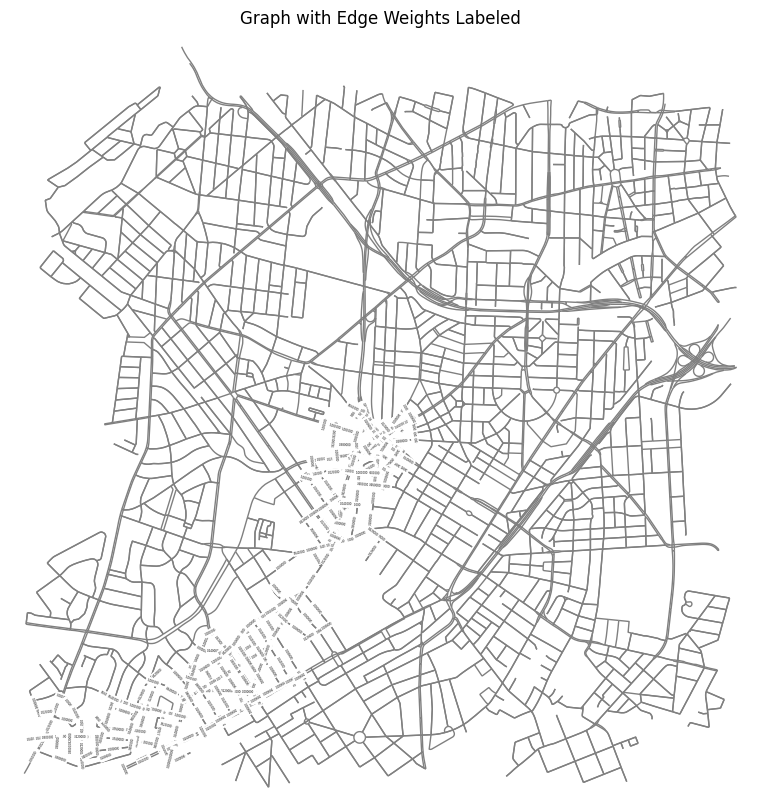

In [377]:
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(G_projected, ax=ax, node_size=0, edge_color="gray", show=False, close=False)
# edge_labels = {(u, v): f'{data["weight"]:.1f}' for u, v, data in G_projected.edges(data=True)}
# edge_labels = {(u, v): f'{data["weight"]:.6f}' for u, v, data in G_projected.edges(data=True) if u in buffer_node_ids and v in buffer_node_ids}
pos = {n: (data["x"], data["y"]) for n, data in G_projected.nodes(data=True)}

nx.draw_networkx_edge_labels(G_projected, pos=pos, edge_labels=edge_labels, font_size=2, ax=ax)

plt.title("Graph with Edge Weights Labeled")
plt.savefig('high_resolution_plot.png', dpi=300)
plt.show()

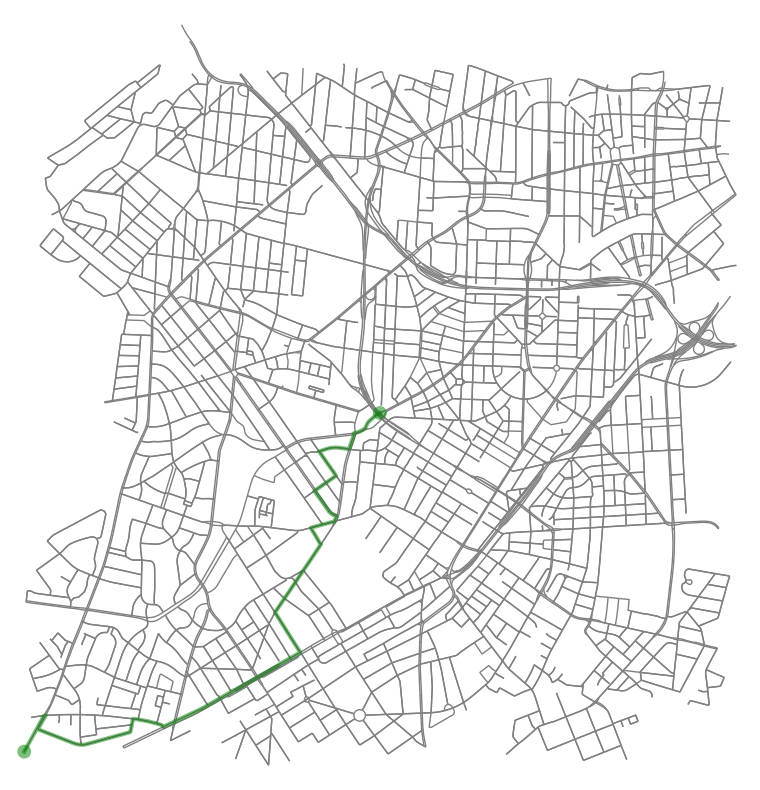

In [380]:
route_sun = nx.shortest_path(G_projected, start_node, end_node, weight="sun")
# print(route)

# route_sun_line = LineString([(G_projected.nodes[n]["x"], G_projected.nodes[n]["y"]) for n in route_sun])
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(
    G_projected, 
    node_size=0, 
    edge_color="gray", 
    show=False, 
    close=False,
    ax=ax
)
ox.plot_graph_route(
    G_projected, 
    route_sun, 
    route_linewidth=3, 
    route_color="green", 
    ax=ax, 
    orig_dest_node_alpha=0
)
plt.show()

In [ ]:
# print("Edges within buffered zone:")
# edge_count = 0

# for u, v, k, data in G_projected.edges(keys=True, data=True):
#     if u in buffer_node_ids and v in buffer_node_ids:
#         # Get projected coordinates (meters)
#         u_x, u_y = G_projected.nodes[u]['x'], G_projected.nodes[u]['y']
#         v_x, v_y = G_projected.nodes[v]['x'], G_projected.nodes[v]['y']

#         # Transform back to longitude/latitude
#         u_lon, u_lat = transformer.transform(u_x, u_y, direction=pyproj.enums.TransformDirection.INVERSE)
#         v_lon, v_lat = transformer.transform(v_x, v_y, direction=pyproj.enums.TransformDirection.INVERSE)

#         # Print coordinates
#         print(f"Edge {edge_count}: ({u}, {v})")
#         print(f"  Node {u}: ({u_lat:.6f}, {u_lon:.6f})")
#         print(f"  Node {v}: ({v_lat:.6f}, {v_lon:.6f})")
#         print(f"  Weight: {data.get('weight', data.get('length', 'Unknown'))}")
#         print("---")
        
#         edge_count += 1

# print(f"Total edges in buffered zone: {edge_count}")

In [ ]:
# # using OSRM's demo server
# url = f"http://router.project-osrm.org/route/v1/driving/{end[1]},{end[0]};{start[1]},{start[0]}?overview=full&steps=false"
# response = requests.get(url).json()
# polyline_encoded = response['routes'][0]['geometry']
# route_coords = polyline.decode(polyline_encoded)  # Decode to coordinate list

# num_points = 500

# route_line = LineString(route_coords)
# total_length = route_line.length
# interval = total_length / (num_points - 1)

# resampled_points = [route_line.interpolate(i * interval) for i in range(num_points)]
# resampled_coords = [(point.y, point.x) for point in resampled_points]

# geojson_linestring = GeoLineString(resampled_coords)
# print(geojson_linestring) 

In [ ]:
# # Configure headless Chrome
# chrome_options = Options()
# # chrome_options.add_argument("--headless=new")  # New headless mode
# chrome_options.add_argument("--disable-gpu")

# # Initialize driver
# driver = webdriver.Chrome(options=chrome_options)

# GeoJSON = {
#     "type": "Feature",
#     "properties": {
#         "name": "Route 101 (20 min.)",
#         "num": "3101a",
#         "description": "*U Turmstr. - Zehlendorf, Sachtlebenstr.*"
#     },
#     "geometry": geojson_linestring
# }

# js_dump = quote(json.dumps(GeoJSON))
# # print(GeoJSON)

# # Load local HTML file (use absolute path)
# driver.get(f"C:/Users/12404/Documents/CS725/route.html#data=application/json,{js_dump}")

# # print("before wait")
# # WebDriverWait(driver, 20).until(
# #     lambda x: x.execute_script("return typeof cont !== 'undefined'")
# # )
# # print("after")

# # driver.execute_script(f"GeoJSON = {js_dump}")

# # time.sleep(5)
# # Wait for specific element/signal
# WebDriverWait(driver, 30).until(
#     lambda x: x.execute_script("return typeof combined !== 'undefined'")
# )

# # Execute JavaScript to retrieve variables
# js_variable = driver.execute_script("return combined;")
# print(f"Captured value: {js_variable}")

# # Always clean up
# driver.quit()


In [ ]:
# fig, ax = plt.subplots()

# ox.plot_graph(
#     G_projected, 
#     node_size=0, 
#     edge_color="gray", 
#     show=False, 
#     close=False,
#     ax=ax
# )

# # # plt.show()
# # x_bounds = ax.get_xlim()
# # y_bounds = ax.get_ylim()

# # print(f"X-axis bounds: {x_bounds}")
# # print(f"Y-axis bounds: {y_bounds}")
# gdf_buffer.plot(ax=ax, color="blue", alpha=0.3)
# ax.set_aspect(0.9) 
# plt.show()

######################################################################################

# fig, ax = plt.subplots()
# ax1 = plt.axes([0, 0, 1, 1])
# ax2 = plt.axes([0, 0, 1, 1])
# ox.plot_graph(
#     G_projected, 
#     node_size=0, 
#     edge_color="gray", 
#     show=False, 
#     close=False,
#     ax=ax1
# )
# ax1.set_axis_off()
# ax2.set_axis_off()
# gdf_buffer.plot(ax=ax2, color="blue", alpha=0.3)
# ax2.set_aspect(0.9)
# plt.show()

#####################################################################################

# ox.stats.intersection_count(G)

# intersections = ox.clean_intersections(G_projected, tolerance=15, dead_ends=False)

# Convert intersections to GeoDataFrame and filter by buffer
# gdf_intersections = ox.utils_graph.graph_to_gdfs(G_projected, edges=False)
# gdf_intersections = gdf_intersections[gdf_intersections.intersects(buffered_route)]

# Method 1: Direct assignment during iteration
# for u, v, k, data in G_projected.edges(keys=True, data=True):
#     G_projected[u][v][k]["weight"] = data["length"]

# Method 2: Dictionary comprehension (alternative)
# edge_weights = {(u, v, k): d["length"] for u, v, k, d in G_projected.edges(keys=True, data=True)}
# nx.set_edge_attributes(G_projected, edge_weights, "weight")

# Verify weights
# print(list(G_projected.edges(data="weight"))[0])
# G = ox.graph_from_point(
#     (40.7128, -74.0060),  # Replace with valid (lat, lon)
#     dist=1000,             # Minimum 500-1000 meters for urban areas
#     network_type="all",    # Start with "all" to maximize results
#     simplify=False,        # Disable simplification initially
#     truncate_by_edge=True  # Extend search beyond exact radius
# )
# print(G)
# G_projected = ox.project_graph(G)

# nodes = ox.graph_to_gdfs(G_projected, edges=False)
# node_coords = nodes[["x", "y"]].values
# tree = cKDTree(node_coords)

# crs_projected = G_projected.graph["crs"]

# # Transform lat/lon → projected x/y
# transformer = Transformer.from_crs("EPSG:4326", crs_projected, always_xy=True)
# x_projected, y_projected = transformer.transform(-74.0060, 40.7128)

# distances, indices = tree.query([x_projected, y_projected], k=4)
# nearest_node_ids = nodes.iloc[indices].index.tolist()

# print(distances)
# nx.set_edge_attributes(G_projected, name="weight", values=ox.utils_graph.get_edge_attributes(G_projected, "length"))

# # Verify weights
# print(G_projected.edges(data="weight")[0])  # Output: (u, v, key, weight)

# start_node = ox.distance.nearest_nodes(G, X=start_lon, Y=start_lat)
# end_node = ox.distance.nearest_nodes(G, X=end_lon, Y=end_lat)

# route = ox.shortest_path(G, start_node, end_node, weight="length")

# Initialize directed graph
# directional_graph = ox.DiGraph()

# # Add nodes and edges from the route
# prev_node = None
# for node in route:
#     # Add intersection (node) with coordinates
#     directional_graph.add_node(
#         node,
#         x=G.nodes[node]["x"],
#         y=G.nodes[node]["y"]
#     )
    
#     # Add edge with distance (weight) from previous node
#     if prev_node:
#         edge_data = G.get_edge_data(prev_node, node)[0]  # First edge
#         directional_graph.add_edge(
#             prev_node,
#             node,
#             weight=edge_data["length"]
#         )
#     prev_node = node
